In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress

from halomod import TracerHaloModel
import halomod
import hmf

In [2]:
'''
Labels = ['0-Number_particles', '1-M200', '2-Mtot','3-Mvir','4-MFOF', '5-R200', '6-Rvir', '7-Offset', 
          '8-kinetic_energy', '9-potential_energy', '10-energy_ratio',
          '11-angular_momentum','12-spin_parameter', '13-Sigma3D', '14-Sigma1D',
          '15-Sigma_major','16-Sigma_semi','17-Sigma_minor','18-Sigmav',
          '19-axis_ratio_c/a','20-axis_ratio_b/a','21-rho_1Mpc','22-rho_2.5Mpc','23-rho_5Mpc',
          '24-rho_10N','25-rho_20N','26-rho_64N','27-particle_mass', '28-box_size',
          '29-N_subhalos','30-m200_subhalo','31-Mvir_subhalo','32-Mtot_subhalo','33-Mfof_subhalo',
          '34-Sigma_subhalos','35-Vmax','36-Vmax_subhalo',
          '37-fraction_subhalo','38-fraction_v_subhalo','39-formation_time','40-accretion_rate',
          '41-Major_merger','42-max_mass','43-max_redshift'] 
'''

S1 = np.loadtxt('./data/L31pt25_N512/newL31pt25_N512.txt',  skiprows=1)
S2 = np.loadtxt('./data/L62pt5_N512/newL62pt5_N512.txt',  skiprows=1)
S3 = np.loadtxt('./data/L125_N512/newL125_N512.txt',  skiprows=1)
S4 = np.loadtxt('./data/L250_N512/newL250_N512.txt',  skiprows=1)
S5 = np.loadtxt('./data/L500_N512/newL500_N512.txt',  skiprows=1)
S6 = np.loadtxt('./data/L1000_N512/newL1000_N512.txt',  skiprows=1)

S1 = S1[S1[:,0]>2]
S2 = S2[S2[:,0]>2]
S3 = S3[S3[:,0]>2]
S4 = S4[S4[:,0]>2]
S5 = S5[S5[:,0]>2]
S6 = S6[S6[:,0]>2]
print(len(S1),len(S2),len(S3),len(S4),len(S5),len(S6))

S1 = S1[S1[:,0]>600]
S2 = S2[S2[:,0]>600]
S3 = S3[S3[:,0]>600]
S4 = S4[S4[:,0]>600]
S5 = S5[S5[:,0]>600]
S6 = S6[S6[:,0]>600]

print(S1[1,27])
print(S2[1,27])
print(S3[1,27])
print(S4[1,27])
print(S5[1,27])
print(S6[1,27])
print(len(S1),len(S2),len(S3),len(S4),len(S5),len(S6))

63951 77192 91903 122835 158328 186525
0.0008976589888334274
0.007181271910667419
0.05896962434053421
0.45960140228271484
3.6768112182617188
29.41448974609375
5790 6993 8245 10176 10690 5888


/tmp/ipykernel_231092/3758363386.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_231092/3758363386.py:21: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


(-9.0, 1.0)

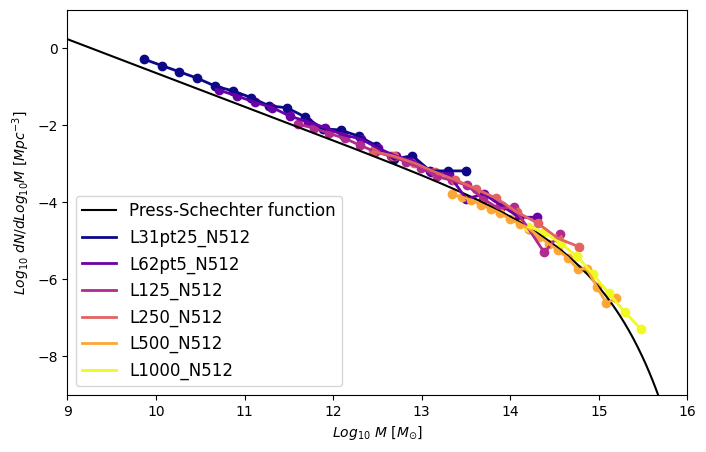

In [3]:
h = 0.6774
### Press-Schechter function ###
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

datasets = [S1, S2, S3, S4, S5, S6]
numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))

###  Halo mass function
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)
    
# plt.legend(fontsize=9,loc='upper right')
plt.legend(fontsize=12,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))
# plt.savefig('figures/halo_mass_function.png')

Text(0.5, 0, 'Log$_{10}$ Halo Mass [M$_{\\odot}$]')

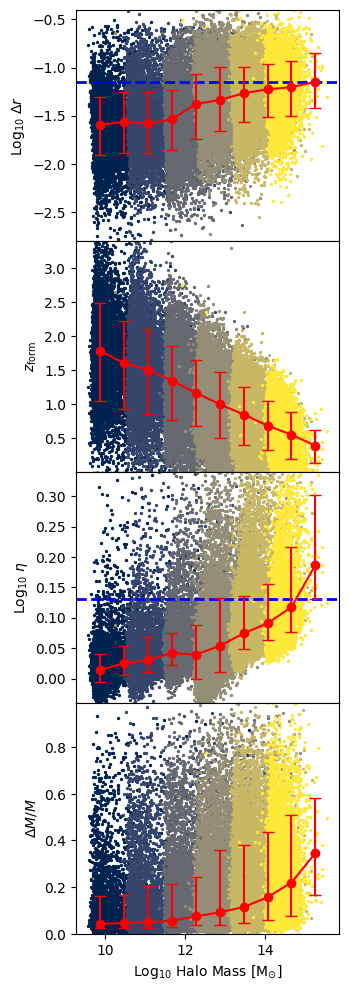

In [4]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.cividis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_offset)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(3.4,12))

# fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.0)

ax=fig.add_subplot(4,1,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 7]), s=2, color=color)
plt.axhline(np.log10(0.07),color="b",linestyle="--",lw=2)  
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')

plt.ylim(-2.8,-0.4)
plt.ylabel(r"Log$_{10}~\Delta r$ ")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

#########################################################
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])

x = np.log10(all_M200)+10
y = all_zform
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])


ax=fig.add_subplot(4,1,2)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, dataset[:, 39], s=2, color=color)

ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')
plt.ylim(0.01,3.4)

plt.ylabel(r"$z_{\rm form}$")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

#########################################################
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_virial_ratio = np.concatenate([dataset[:, 10] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_virial_ratio)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])


ax=fig.add_subplot(4,1,3)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 10]), s=2, color=color)
plt.axhline(np.log10(1.35),color="b",linestyle="--",lw=2) 
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')
plt.ylim(-0.04,0.34)

plt.ylabel(r"Log$_{10}~\eta$ ")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

####################################
all_merger = np.concatenate([dataset[:, 42] for dataset in datasets])
x = np.log10(all_M200)+10
y = all_merger
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])

ax=fig.add_subplot(4,1,4)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, dataset[:, 42], s=2, color=color)
 
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')

plt.ylim(0,0.99)
plt.ylabel(r"$\Delta M/ M$")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

# plt.savefig('figures/offset_zform_virialratio.png', bbox_inches='tight')

0.3355465080162653
0.33460776516092405
0.33160501480648424
0.32574167147122157
0.3252789310585156
0.338738494615381
0.3263866820319266
0.3295582138120867


/tmp/ipykernel_231092/1507597712.py:57: RuntimeWarning: invalid value encountered in log10
  group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]


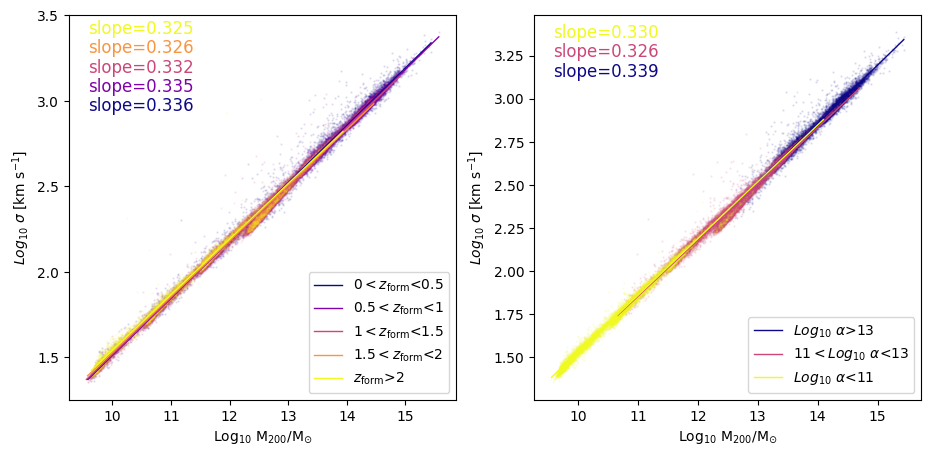

In [5]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
group_ranges = [(0, 0.5), (0.5, 1),(1, 1.5),(1.5, 2), (2, np.inf)]
fit_results = {}
labels= [r"$0<z_{\rm form}$<0.5",r"$0.5<z_{\rm form}$<1",r"$1<z_{\rm form}$<1.5",r"$1.5<z_{\rm form}$<2",r"$z_{\rm form}$>2"]
colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

for i, group_range in enumerate(group_ranges):
    group_indices = np.where((all_zform >= group_range[0]) & (all_zform < group_range[1]))[0]
    group_M200 = np.log10(all_M200[group_indices]) + 10
    group_veldisp_3d = np.log10(all_veldisp_3d[group_indices])
    
    slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d)
    fit_results[group_range] = (slope_M200, intercept_M200)

    x = group_M200
    y = group_veldisp_3d
    valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_x = np.linspace(min(x), max(x), 100)
    best_fit_y = slope * best_fit_x + intercept
    print(slope)
    ax.text(0.05, 0.75 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
    ax.scatter(group_M200, group_veldisp_3d,  s=0.5, alpha=0.1, color=colors[i])
    # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
    ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=1, label=labels[i]) 

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend(loc='lower right')

####################################
ax=fig.add_subplot(1,2,2)

all_accretion_rate = np.concatenate([dataset[:, 40] for dataset in datasets])

# group_ranges = [(14, np.inf),(12, 14), (10, 12),(6, 10)]
group_ranges = [(13, np.inf),(11, 13), (6, 11)]
fit_results = {}
# labels= [r"$Log_{10}~\alpha$>14",r"$12<Log_{10}~\alpha$<14",r"$10<Log_{10}~\alpha$<12",r"$Log_{10}~\alpha$<10"]
labels= [r"$Log_{10}~\alpha$>13",r"$11<Log_{10}~\alpha$<13",r"$Log_{10}~\alpha$<11"]

colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

for i, group_range in enumerate(group_ranges):
    group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]
    group_M200 = np.log10(all_M200[group_indices]) + 10
    group_veldisp_3d = np.log10(all_veldisp_3d[group_indices])
    
    slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d)
    fit_results[group_range] = (slope_M200, intercept_M200)

    x = group_M200
    y = group_veldisp_3d
    valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_x = np.linspace(min(x), max(x), 100)
    best_fit_y = slope * best_fit_x + intercept
    print(slope)
    ax.text(0.05, 0.84 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
    ax.scatter(group_M200, group_veldisp_3d,  s=0.5, alpha=0.1, color=colors[i])
    # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
    ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=1, label=labels[i]) 

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend(loc='lower right')

# plt.savefig('figures/mass_veldisp_particles.png')

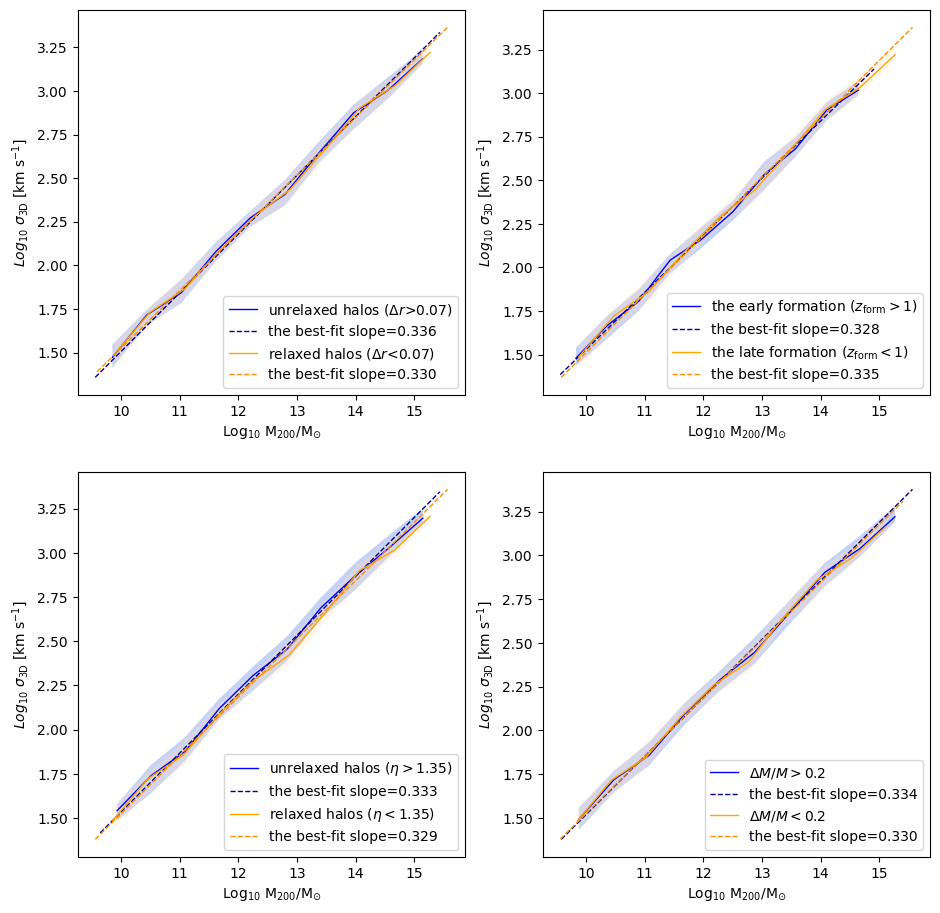

In [6]:
datasets = [S1, S2, S3, S4, S5, S6]

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])

all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])
all_virial_ratio = np.concatenate([dataset[:, 10] for dataset in datasets])
all_merger = np.concatenate([dataset[:, 42] for dataset in datasets])

fig=plt.figure(figsize=(11,11))
ax=fig.add_subplot(2,2,1)

x2 = np.log10(all_M200[all_offset>0.07])+10
y2 = np.log10(all_veldisp_3d[all_offset>0.07])
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
best_fit_x2 = np.linspace(min(x2), max(x2), 100)
best_fit_y2 = slope * best_fit_x2 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='blue', label=r"unrelaxed halos ($\Delta r$>0.07)")
ax.plot(best_fit_x2, best_fit_y2, color='darkblue', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

############
x1 = np.log10(all_M200[all_offset<0.07])+10
y1 = np.log10(all_veldisp_3d[all_offset<0.07])
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='bisque', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='orange', label=r"relaxed halos ($\Delta r$<0.07)")
ax.plot(best_fit_x1, best_fit_y1, color='darkorange', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')


###################################
ax=fig.add_subplot(2,2,2)

x2 = np.log10(all_M200[all_zform>1])+10
y2 = np.log10(all_veldisp_3d[all_zform>1])
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
best_fit_x2 = np.linspace(min(x2), max(x2), 100)
best_fit_y2 = slope * best_fit_x2 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='blue', label=r"the early formation ($z_{\rm form}>1$)")
ax.plot(best_fit_x2, best_fit_y2, color='darkblue', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

############
x1 = np.log10(all_M200[all_zform<1])+10
y1 = np.log10(all_veldisp_3d[all_zform<1])
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='bisque', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='orange', label=r"the late formation ($z_{\rm form}<1$)")
ax.plot(best_fit_x1, best_fit_y1, color='darkorange', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')

###################################
ax=fig.add_subplot(2,2,3)

x2 = np.log10(all_M200[all_virial_ratio>1.35])+10
y2 = np.log10(all_veldisp_3d[all_virial_ratio>1.35])
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
best_fit_x2 = np.linspace(min(x2), max(x2), 100)
best_fit_y2 = slope * best_fit_x2 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='blue', label=r"unrelaxed halos ($\eta > 1.35$)")
ax.plot(best_fit_x2, best_fit_y2, color='darkblue', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

############
x1 = np.log10(all_M200[all_virial_ratio<1.35])+10
y1 = np.log10(all_veldisp_3d[all_virial_ratio<1.35])
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='bisque', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='orange', label=r"relaxed halos ($\eta < 1.35$)")
ax.plot(best_fit_x1, best_fit_y1, color='darkorange', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')

###################################
ax=fig.add_subplot(2,2,4)

x2 = np.log10(all_M200[all_merger>0.2])+10
y2 = np.log10(all_veldisp_3d[all_merger>0.2])
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
best_fit_x2 = np.linspace(min(x2), max(x2), 100)
best_fit_y2 = slope * best_fit_x2 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='blue', label=r"$\Delta M / M > 0.2$")
ax.plot(best_fit_x2, best_fit_y2, color='darkblue', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

############
x1 = np.log10(all_M200[all_merger<0.2])+10
y1 = np.log10(all_veldisp_3d[all_merger<0.2])
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='bisque', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='orange', label=r"$\Delta M / M < 0.2$")
ax.plot(best_fit_x1, best_fit_y1, color='darkorange', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')

# plt.savefig('figures/mass_veldisp_panels.png')

Text(0, 0.5, '$Log_{10}~\\sigma_{\\rm 3D}$ [km s$^{-1}$]')

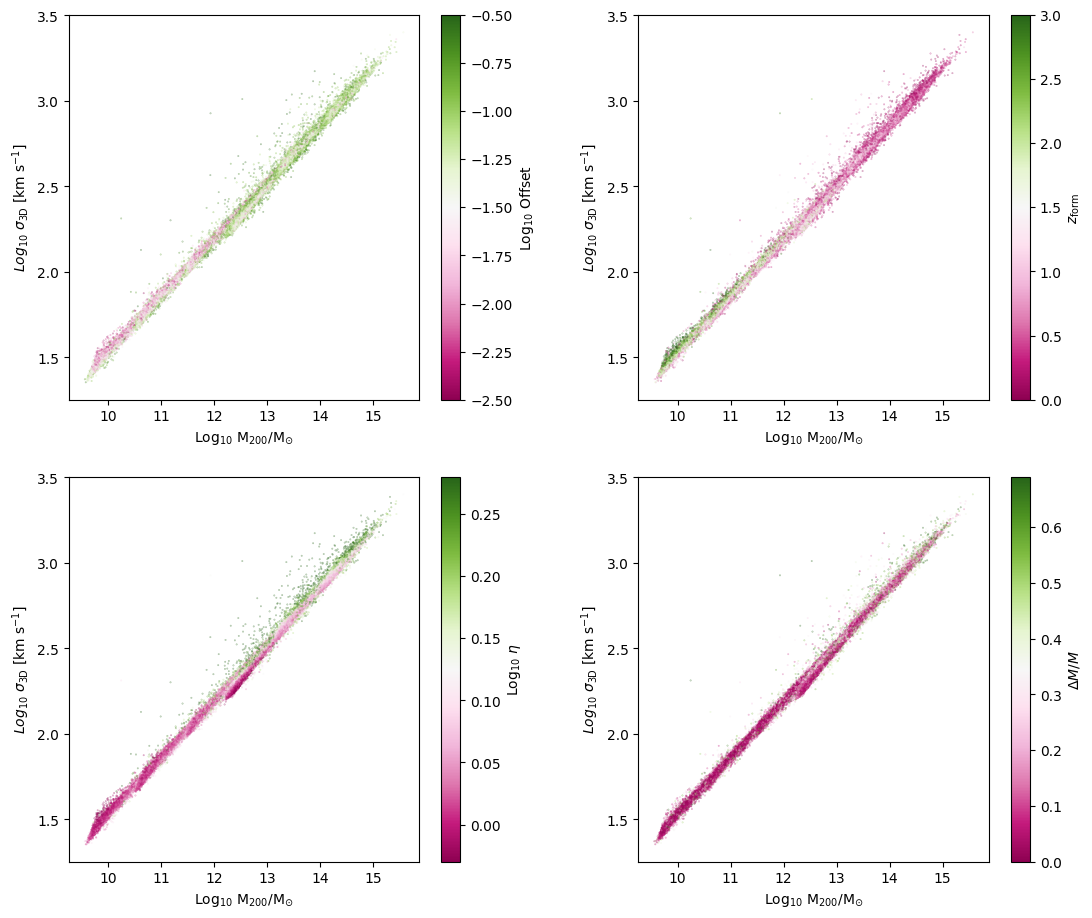

In [7]:
datasets = [S1, S2, S3, S4, S5, S6]

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])

all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])
all_virial_ratio = np.concatenate([dataset[:, 10] for dataset in datasets])
all_merger = np.concatenate([dataset[:, 42] for dataset in datasets])

fig=plt.figure(figsize=(13,11))

fig.subplots_adjust(wspace=0.3)
# fig.subplots_adjust(hspace=0.0)

ax=fig.add_subplot(2,2,1)

x1 = np.log10(all_M200)+10
y1 = np.log10(all_veldisp_3d)
z1 = np.log10(all_offset)

cmap1 = plt.get_cmap('PiYG')
norm1 = plt.Normalize(-2.5, -0.5)
plt.scatter(x1, y1, s=0.1, alpha=0.5, c=z1, cmap=cmap1, norm=norm1)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm1, cmap=cmap1), ax=ax)
cbar.set_label(r'Log$_{10}~$Offset')
ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')

ax=fig.add_subplot(2,2,2)
z2 = all_zform

cmap2 = plt.get_cmap('PiYG')
norm2 = plt.Normalize(0, 3)
plt.scatter(x1, y1, s=0.1, alpha=0.5, c=z2, cmap=cmap2, norm=norm2)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm2, cmap=cmap2), ax=ax)
cbar.set_label(r'$z_{\rm form}$')
ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')

ax=fig.add_subplot(2,2,3)
z3 = np.log10(all_virial_ratio)

cmap3 = plt.get_cmap('PiYG')
norm3 = plt.Normalize(-0.03, 0.28)
plt.scatter(x1, y1, s=0.1, alpha=0.5, c=z3, cmap=cmap3, norm=norm3)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm3, cmap=cmap3), ax=ax)
cbar.set_label(r'Log$_{10}~\eta$')
ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')

ax=fig.add_subplot(2,2,4)
z4 = all_merger

cmap4 = plt.get_cmap('PiYG')
norm4 = plt.Normalize(0, 0.69)
plt.scatter(x1, y1, s=0.1, alpha=0.5, c=z4, cmap=cmap4, norm=norm4)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm4, cmap=cmap4), ax=ax)
cbar.set_label(r'$\Delta M / M$')
ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')

# plt.savefig('figures/mass_veldisp_colors.png')

/tmp/ipykernel_231092/3196862352.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_231092/3196862352.py:32: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_231092/3196862352.py:70: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_231092/3196862352.py:146: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_231092/3196862352.py:156: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_231092/3196862352.py:190: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)

(-9.0, 1.0)

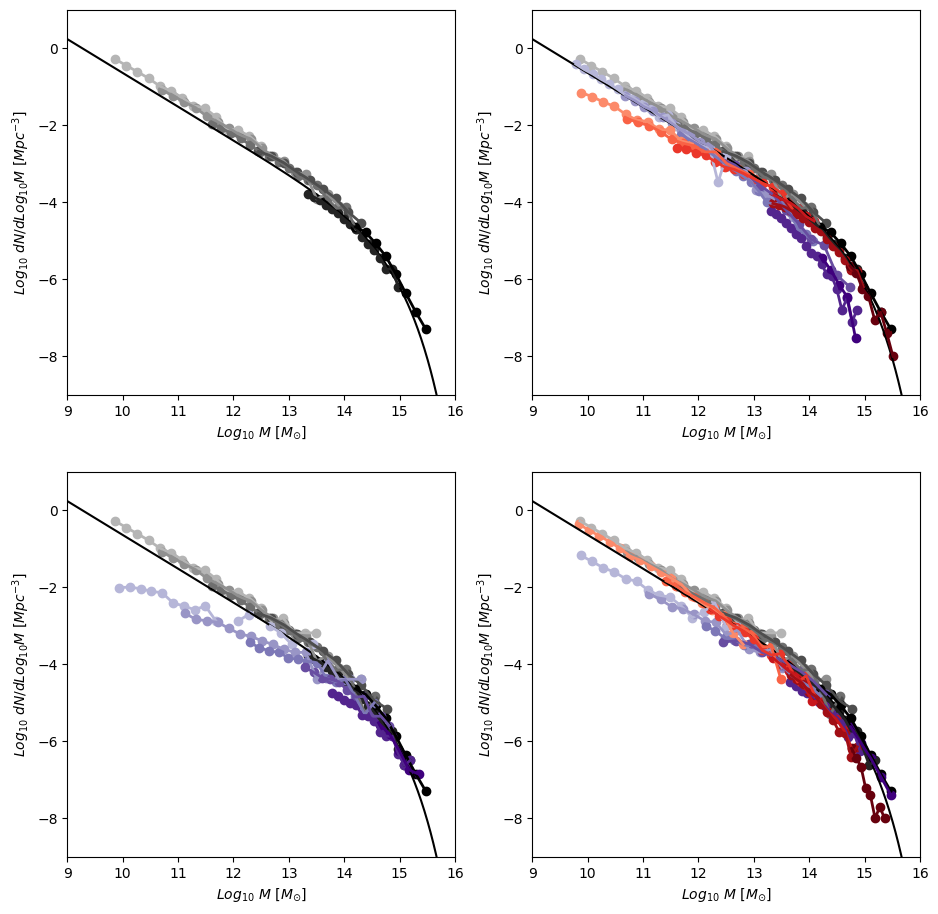

In [8]:
h = 0.6774

hmf_all = np.empty((0, 2)) 
hmf_offset_1 = np.empty((0, 2)) 
hmf_offset_2 = np.empty((0, 2)) 
hmf_form_1 = np.empty((0, 2)) 
hmf_form_2 = np.empty((0, 2)) 
hmf_eta_1 = np.empty((0, 2)) 
hmf_eta_2 = np.empty((0, 2)) 
hmf_merger_1 = np.empty((0, 2)) 
hmf_merger_2 = np.empty((0, 2)) 

### Press-Schechter function ###
fig=plt.figure(figsize=(11,11))
ax=fig.add_subplot(2,2,1)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

datasets = [S1, S2, S3, S4, S5, S6]
numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.Greys(np.linspace(0.4, 1, len(datasets)))

###  Halo mass function
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        
    if idx == 1:
        lm = lm[1:15]
        ldndlm = ldndlm[1:15]
    elif idx == 2:
        lm = lm[1:18]
        ldndlm = ldndlm[1:18]
    elif idx == 3:
        lm = lm[2:18]
        ldndlm = ldndlm[2:18]
    elif idx == 4:
        lm = lm[9:18]
        ldndlm = ldndlm[9:18]
    elif idx == 5:
        lm = lm[2:18]
        ldndlm = ldndlm[2:18]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
        
    data_all = np.column_stack((lm, ldndlm))
    hmf_all = np.vstack((hmf_all, data_all))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################

colors = plt.cm.Purples(np.linspace(0.4, 1, len(datasets)))

###  offset 0.07 dataset[:,7]
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,7]>0.07])) - np.min(np.log10(dataset[:,1][dataset[:,7]>0.07]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,7]>0.07]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[5:]
        ldndlm = ldndlm[5:]
    elif idx == 4:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    elif idx == 5:
        lm = lm[5:]
        ldndlm = ldndlm[5:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]

    data_offset_1 = np.column_stack((lm, ldndlm))
    hmf_offset_1 = np.vstack((hmf_offset_1, data_offset_1))
    # ax.scatter(lm, ldndlm, color=color)
    # ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################

colors = plt.cm.Reds(np.linspace(0.4, 1, len(datasets)))

###  offset 0.07 dataset[:,7]
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,7]<0.07])) - np.min(np.log10(dataset[:,1][dataset[:,7]<0.07]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,7]<0.07]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]

    data_offset_2 = np.column_stack((lm, ldndlm))
    hmf_offset_2 = np.vstack((hmf_offset_2, data_offset_2))
    # ax.scatter(lm, ldndlm, color=color)
    # ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)
    
# plt.legend(fontsize=9,loc='upper right')
# plt.legend(fontsize=12,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))


################################################################
ax=fig.add_subplot(2,2,2)
colors = plt.cm.Greys(np.linspace(0.4, 1, len(datasets)))
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

###  Halo mass function
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:17]
        ldndlm = ldndlm[1:17]
    elif idx == 2:
        lm = lm[1:18]
        ldndlm = ldndlm[1:18]
    elif idx == 3:
        lm = lm[2:18]
        ldndlm = ldndlm[2:18]
    elif idx == 4:
        lm = lm[9:18]
        ldndlm = ldndlm[9:18]
    elif idx == 5:
        lm = lm[2:18]
        ldndlm = ldndlm[2:18]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################
###  z_form 1 dataset[:,39]
colors = plt.cm.Purples(np.linspace(0.4, 1, len(datasets)))

dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,39]>1])) - np.min(np.log10(dataset[:,1][dataset[:,39]>1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,39]>1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[15:]
        ldndlm = ldndlm[15:]

    data_form_1 = np.column_stack((lm, ldndlm))
    hmf_form_1 = np.vstack((hmf_form_1, data_form_1))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################

colors = plt.cm.Reds(np.linspace(0.4, 1, len(datasets)))
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,39]<1])) - np.min(np.log10(dataset[:,1][dataset[:,39]<1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,39]<1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:12]
        ldndlm = ldndlm[1:12]
    elif idx == 2:
        lm = lm[1:13]
        ldndlm = ldndlm[1:13]
    elif idx == 3:
        lm = lm[2:15]
        ldndlm = ldndlm[2:15]
    elif idx == 4:
        lm = lm[9:15]
        ldndlm = ldndlm[9:15]
    elif idx == 5:
        lm = lm[2:18]
        ldndlm = ldndlm[2:18]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]

    data_form_2 = np.column_stack((lm, ldndlm))
    hmf_form_2 = np.vstack((hmf_form_2, data_form_2))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)
    
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))
################################################################
ax=fig.add_subplot(2,2,3)
colors = plt.cm.Greys(np.linspace(0.4, 1, len(datasets)))
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

###  Halo mass function
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################
###  \eta 1.35 dataset[:,10]
colors = plt.cm.Purples(np.linspace(0.4, 1, len(datasets)))

dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,10]>1.35])) - np.min(np.log10(dataset[:,1][dataset[:,10]>1.35]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,10]>1.35]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 3:
        lm = lm[6:]
        ldndlm = ldndlm[6:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[6:]
        ldndlm = ldndlm[6:]
    elif idx == 6:
        lm = lm[15:]
        ldndlm = ldndlm[15:]

    data_eta_1 = np.column_stack((lm, ldndlm))
    hmf_eta_1 = np.vstack((hmf_eta_1, data_eta_1))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################

colors = plt.cm.Reds(np.linspace(0.4, 1, len(datasets)))
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,10]<1.35])) - np.min(np.log10(dataset[:,1][dataset[:,10]<1.35]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,10]<1.35]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]

    data_eta_2 = np.column_stack((lm, ldndlm))
    hmf_eta_2 = np.vstack((hmf_eta_2, data_eta_2))
    # ax.scatter(lm, ldndlm, color=color)
    # ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)
    
# plt.legend(fontsize=9,loc='upper right')
# plt.legend(fontsize=12,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))


################################################################
ax=fig.add_subplot(2,2,4)
colors = plt.cm.Greys(np.linspace(0.4, 1, len(datasets)))
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

###  Halo mass function
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 3:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################
###  merger 0.2 dataset[:,42]
colors = plt.cm.Purples(np.linspace(0.4, 1, len(datasets)))

dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,42]>0.2])) - np.min(np.log10(dataset[:,1][dataset[:,42]>0.2]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,42]>0.2]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:16]
        ldndlm = ldndlm[1:16]
    elif idx == 2:
        lm = lm[3:16]
        ldndlm = ldndlm[3:16]
    elif idx == 3:
        lm = lm[5:18]
        ldndlm = ldndlm[5:18]
    elif idx == 4:
        lm = lm[9:18]
        ldndlm = ldndlm[9:18]
    elif idx == 5:
        lm = lm[5:18]
        ldndlm = ldndlm[5:18]
    elif idx == 6:
        lm = lm[15:]
        ldndlm = ldndlm[15:]

    data_merger_1 = np.column_stack((lm, ldndlm))
    hmf_merger_1 = np.vstack((hmf_merger_1, data_merger_1))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)

##############################

colors = plt.cm.Reds(np.linspace(0.4, 1, len(datasets)))
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1][dataset[:,42]<0.2])) - np.min(np.log10(dataset[:,1][dataset[:,42]<0.2]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1][dataset[:,42]<0.2]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:18]
        ldndlm = ldndlm[1:18]
    elif idx == 2:
        lm = lm[5:18]
        ldndlm = ldndlm[5:18]
    elif idx == 3:
        lm = lm[5:18]
        ldndlm = ldndlm[5:18]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[5:18]
        ldndlm = ldndlm[5:18]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]

    data_merger_2 = np.column_stack((lm, ldndlm))
    hmf_merger_2 = np.vstack((hmf_merger_2, data_merger_2))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)
    
# plt.legend(fontsize=9,loc='upper right')
# plt.legend(fontsize=12,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))
# plt.savefig('figures/halo_mass_function.png')


/tmp/ipykernel_231092/560078808.py:54: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_231092/560078808.py:71: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_231092/560078808.py:88: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_231092/560078808.py:105: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')


(-8.6, 0.0)

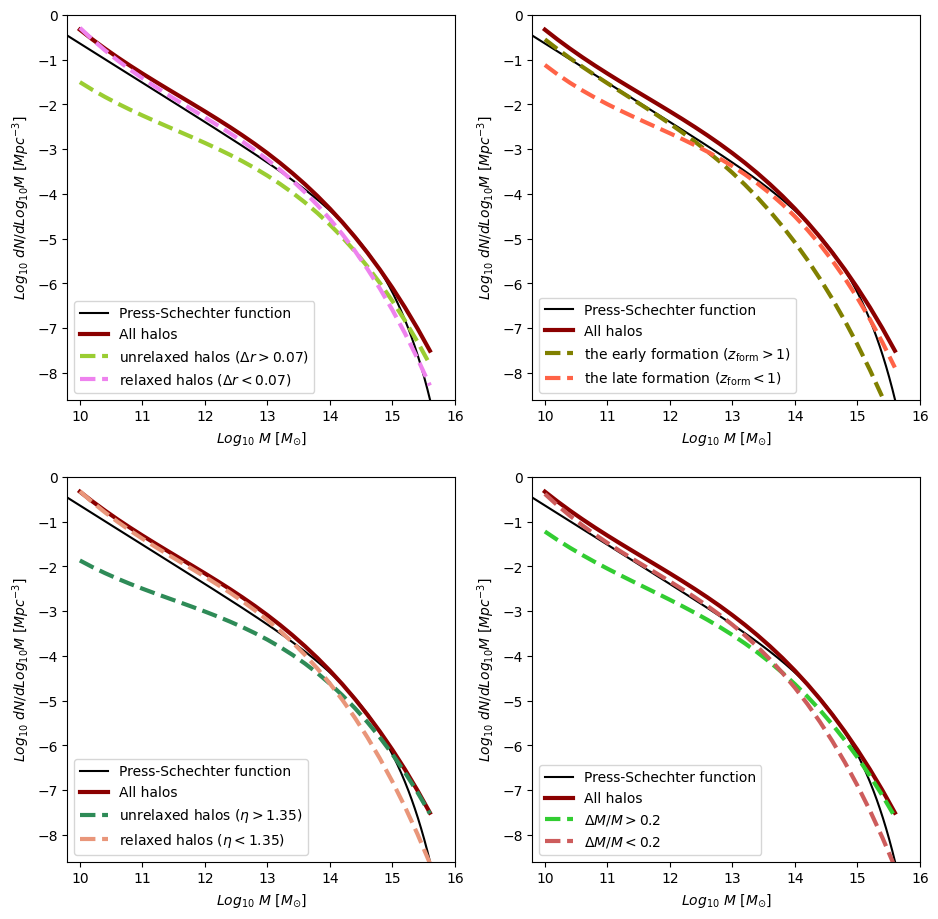

In [9]:
hmf_offset_1= hmf_offset_1[hmf_offset_1[:, 1] != -np.inf]
hmf_offset_2= hmf_offset_2[hmf_offset_2[:, 1] != -np.inf]
hmf_form_1= hmf_form_1[hmf_form_1[:, 1] != -np.inf]
hmf_form_2= hmf_form_2[hmf_form_2[:, 1] != -np.inf]
hmf_eta_1= hmf_eta_1[hmf_eta_1[:, 1] != -np.inf]
hmf_eta_2= hmf_eta_2[hmf_eta_2[:, 1] != -np.inf]
hmf_merger_1= hmf_merger_1[hmf_merger_1[:, 1] != -np.inf]
hmf_merger_2= hmf_merger_2[hmf_merger_2[:, 1] != -np.inf]

hmf = np.polyfit(hmf_all[:,0], hmf_all[:,1], 3)
hmf_o1 = np.polyfit(hmf_offset_1[:,0], hmf_offset_1[:,1], 3)
hmf_o2 = np.polyfit(hmf_offset_2[:,0], hmf_offset_2[:,1], 3)

hmf_f1 = np.polyfit(hmf_form_1[:,0], hmf_form_1[:,1], 3)
hmf_f2 = np.polyfit(hmf_form_2[:,0], hmf_form_2[:,1], 3)

hmf_e1 = np.polyfit(hmf_eta_1[:,0], hmf_eta_1[:,1], 3)
hmf_e2 = np.polyfit(hmf_eta_2[:,0], hmf_eta_2[:,1], 3)

hmf_m1 = np.polyfit(hmf_merger_1[:,0], hmf_merger_1[:,1], 3)
hmf_m2 = np.polyfit(hmf_merger_2[:,0], hmf_merger_2[:,1], 3)

# print(hmf_o1)
# hmf3 = np.polyfit(hmf_a3[:,0], hmf_a3[:,1], 2)

x = np.arange(10,15.7,0.2)
y = np.polyval(hmf,x)

x1 = np.arange(10,15.7,0.2)
y1 = np.polyval(hmf_o1,x1)
x2 = np.arange(10,15.7,0.2)
y2 = np.polyval(hmf_o2,x2)

x3 = np.arange(10,15.7,0.2)
y3 = np.polyval(hmf_f1,x3)
x4 = np.arange(10,15.7,0.2)
y4 = np.polyval(hmf_f2,x4)

x5 = np.arange(10,15.7,0.2)
y5 = np.polyval(hmf_e1,x5)
x6 = np.arange(10,15.7,0.2)
y6 = np.polyval(hmf_e2,x6)

x7 = np.arange(10,15.7,0.2)
y7 = np.polyval(hmf_m1,x7)
x8 = np.arange(10,15.7,0.2)
y8 = np.polyval(hmf_m2,x8)

h = 0.6774
### Press-Schechter function ###
fig=plt.figure(figsize=(11,11))
ax=fig.add_subplot(2,2,1)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# ax.scatter(hmf_all[:,0], hmf_all[:,1])
ax.plot(x, y, color='darkred', linewidth=3, linestyle='-', label='All halos')
# ax.scatter(hmf_offset_1[:,0], hmf_offset_1[:,1], color='g')
ax.plot(x1, y1, color='yellowgreen', linewidth=3, linestyle='--', label=r"unrelaxed halos ($\Delta r > 0.07$)")
# ax.scatter(hmf_offset_2[:,0], hmf_offset_2[:,1], color='b')
ax.plot(x2, y2, color='violet', linewidth=3, linestyle='--', label=r"relaxed halos ($\Delta r < 0.07$)")

plt.legend(fontsize=10,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9.8,16))
ax.set_ylim((-8.6,0))

ax=fig.add_subplot(2,2,2)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# ax.scatter(hmf_all[:,0], hmf_all[:,1])
ax.plot(x, y, color='darkred', linewidth=3, linestyle='-', label='All halos')
# ax.scatter(hmf_form_1[:,0], hmf_form_1[:,1], color='g')
ax.plot(x3, y3, color='olive', linewidth=3, linestyle='--', label=r"the early formation ($z_{\rm form} > 1$)")
# ax.scatter(hmf_form_2[:,0], hmf_form_2[:,1], color='b')
ax.plot(x4, y4, color='tomato', linewidth=3, linestyle='--', label=r"the late formation ($z_{\rm form} < 1$)")

plt.legend(fontsize=10,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9.8,16))
ax.set_ylim((-8.6,0))

ax=fig.add_subplot(2,2,3)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# ax.scatter(hmf_all[:,0], hmf_all[:,1])
ax.plot(x, y, color='darkred', linewidth=3, linestyle='-', label='All halos')
# ax.scatter(hmf_eta_1[:,0], hmf_eta_1[:,1], color='g')
ax.plot(x5, y5, color='seagreen', linewidth=3, linestyle='--', label=r"unrelaxed halos ($\eta > 1.35$)")
# ax.scatter(hmf_eta_2[:,0], hmf_eta_2[:,1], color='b')
ax.plot(x6, y6, color='darksalmon', linewidth=3, linestyle='--', label=r"relaxed halos ($\eta < 1.35$)")

plt.legend(fontsize=10,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9.8,16))
ax.set_ylim((-8.6,0))

ax=fig.add_subplot(2,2,4)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# ax.scatter(hmf_all[:,0], hmf_all[:,1])
ax.plot(x, y, color='darkred', linewidth=3, linestyle='-', label='All halos')
# ax.scatter(hmf_merger_1[:,0], hmf_merger_1[:,1], color='g')
ax.plot(x7, y7, color='limegreen', linewidth=3, linestyle='--', label=r"$\Delta M / M > 0.2$")
# ax.scatter(hmf_merger_2[:,0], hmf_merger_2[:,1], color='b')
ax.plot(x8, y8, color='indianred', linewidth=3, linestyle='--', label=r"$\Delta M / M < 0.2$")

plt.legend(fontsize=10,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9.8,16))
ax.set_ylim((-8.6,0))

# plt.savefig('figures/hmf_4panels.png', bbox_inches='tight')

-0.12137292740683887 0.10028165453238048


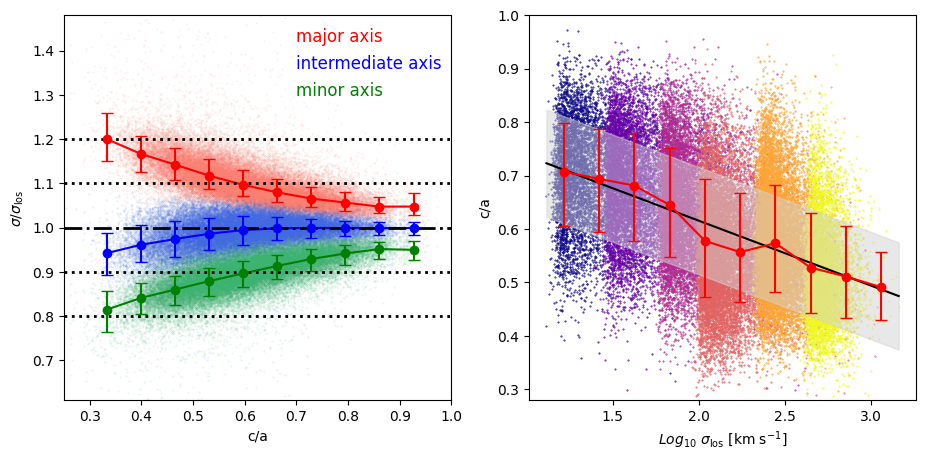

In [10]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])
all_veldisp_1d = np.concatenate([dataset[:, 14] for dataset in datasets])
all_veldisp_major = np.concatenate([dataset[:, 15] for dataset in datasets])
all_veldisp_semi = np.concatenate([dataset[:, 16] for dataset in datasets])
all_veldisp_minor = np.concatenate([dataset[:, 17] for dataset in datasets])

all_c_a = np.concatenate([dataset[:, 19] for dataset in datasets])
all_b_a = np.concatenate([dataset[:, 20] for dataset in datasets])

y = all_c_a
x = np.log10(all_veldisp_1d)

valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

residuals = y - (slope * x + intercept)
std_residuals = np.std(residuals)

# Plot the standard deviation area
upper_bound = best_fit_y + std_residuals
lower_bound = best_fit_y - std_residuals

num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,2)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    y_values = dataset[:, 19]
    x_values = np.log10(dataset[:, 14])
    ax.scatter(x_values, y_values, s=0.2, color=color)
    
plt.plot(best_fit_x, best_fit_y, color='black') 
plt.fill_between(best_fit_x, upper_bound, lower_bound, color='lightgrey', alpha=0.5)
print(slope, std_residuals)

ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

ax.set_ylabel(r"c/a")
ax.set_xlabel(r'$Log_{10}~\sigma_{\rm los}$ [km s$^{-1}$]')
plt.ylim(0.28,1)
##################################################

ax=fig.add_subplot(1,2,1)

x = all_c_a
y = all_veldisp_major/all_veldisp_1d
num_bins = 10
bin_edges = np.linspace(np.min(0.3), np.max(0.96), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])

for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 19]
    y_values = dataset[:, 15]/dataset[:,14]
    ax.scatter(x_values, y_values, s=0.1, alpha=0.2, color='salmon')
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

######################
x = all_c_a
y = all_veldisp_semi/all_veldisp_1d
num_bins = 10
bin_edges = np.linspace(np.min(0.3), np.max(0.96), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])

for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 19]
    y_values = dataset[:, 16]/dataset[:,14]
    ax.scatter(x_values, y_values, s=0.1, alpha=0.2, color='royalblue')
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='b', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='b')

####################
x = all_c_a
y = all_veldisp_minor/all_veldisp_1d
num_bins = 10
bin_edges = np.linspace(np.min(0.3), np.max(0.96), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 84) for i in range(1, num_bins + 1)])

for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 19]
    y_values = dataset[:, 17]/dataset[:,14]
    ax.scatter(x_values, y_values, s=0.1, alpha=0.2, color='mediumseagreen')
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='g', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='g')

plt.axhline(1,color="black",linestyle="-.",lw=2)
plt.axhline(1.2,color="black",linestyle=":",lw=2)
plt.axhline(0.8,color="black",linestyle=":",lw=2)
plt.axhline(1.1,color="black",linestyle=":",lw=2)
plt.axhline(0.9,color="black",linestyle=":",lw=2)
plt.xlim(0.25,1)
plt.ylim(0.61,1.48)

ax.set_xlabel(r"c/a")
ax.set_ylabel(r"$\sigma/\sigma_{\rm los}$")
label = ['major axis','intermediate axis','minor axis']
colors = ['r', 'b', 'g']
for i in range(3):
    ax.text(0.6, 0.93 - i * 0.07, label[i], size=12, color=colors[i], transform=ax.transAxes)

# plt.savefig('figures/veldisp1d_shape.png', bbox_inches='tight')

/tmp/ipykernel_231092/448038286.py:50: RuntimeWarning: divide by zero encountered in log10
  numbins = int((np.max(np.log10(dataset[:,34])) - np.min(np.log10(dataset[:,34][dataset[:, 34] > 0]))) / dlm)
/tmp/ipykernel_231092/448038286.py:55: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


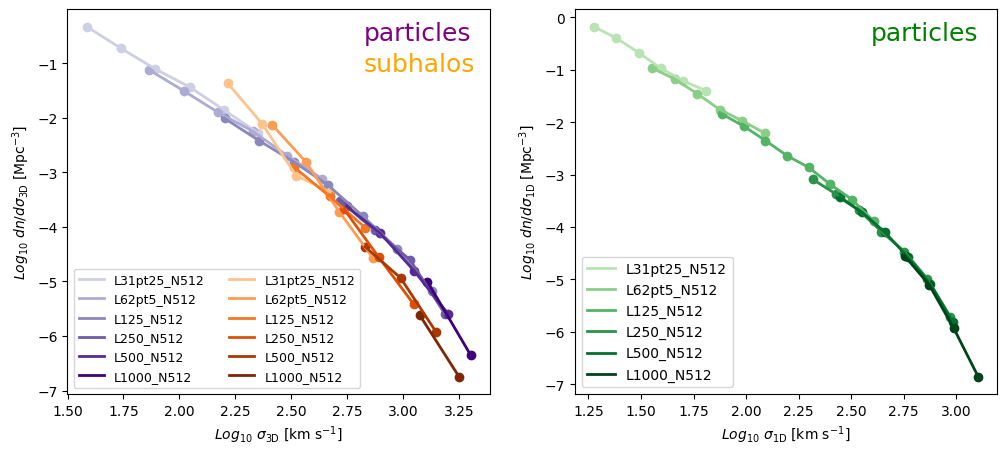

In [11]:
datasets = [S1, S2, S3, S4, S5, S6]

numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.Purples(np.linspace(0.3, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

vdf3d_1 = np.empty((0, 2)) 
vdf3d_2 = np.empty((0, 2)) 

fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)

dlm=0.15
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,13])) - np.min(np.log10(dataset[:,13]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,13]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 2:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 3:
        lm = lm[1:9]
        ldndlm = ldndlm[1:9]
    elif idx == 4:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 5:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 6:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
        
    data_vd_1 = np.column_stack((lm, ldndlm))
    vdf3d_1 = np.vstack((vdf3d_1, data_vd_1))   
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)

colors = plt.cm.Oranges(np.linspace(0.3, 1, len(datasets)))

for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,34])) - np.min(np.log10(dataset[:,34][dataset[:, 34] > 0]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,34][dataset[:, 34] > 0]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[7:]
        ldndlm = ldndlm[7:]
    elif idx == 2:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 3:
        lm = lm[6:9]
        ldndlm = ldndlm[6:9]
    elif idx == 4:
        lm = lm[5:]
        ldndlm = ldndlm[5:]
    elif idx == 5:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 6:
        lm = lm[4:]
        ldndlm = ldndlm[4:]

    data_vd_2 = np.column_stack((lm, ldndlm))
    vdf3d_2 = np.vstack((vdf3d_2, data_vd_2))
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)
    
ax.set_xlabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
ax.set_ylabel(r'$Log_{10}~dn/d \sigma_{\rm 3D}~$[Mpc$^{-3}$]')

label = ['particles','subhalos']
colors = ['purple', 'orange']
for i in range(2):
    ax.text(0.7, 0.92 - i * 0.08, label[i], size=18, color=colors[i], transform=ax.transAxes)
    
plt.legend(ncol=2, prop={'size':9})
#################################################
numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.Greens(np.linspace(0.3, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

ax=fig.add_subplot(1,2,2)

dlm=0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,14])) - np.min(np.log10(dataset[:,14]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,14]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 2:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 3:
        lm = lm[1:9]
        ldndlm = ldndlm[1:9]
    elif idx == 4:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 5:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 6:
        lm = lm[1:]
        ldndlm = ldndlm[1:]

    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)

ax.set_xlabel(r'$Log_{10}~\sigma_{\rm 1D}$ [km s$^{-1}$]')
ax.set_ylabel(r'$Log_{10}~dn/d \sigma_{\rm 1D}$ [Mpc$^{-3}]$')
ax.text(0.7, 0.92 , 'particles', size=18, color='green', transform=ax.transAxes)
plt.legend(loc='lower left')

# plt.savefig('figures/veldisp_function.png')

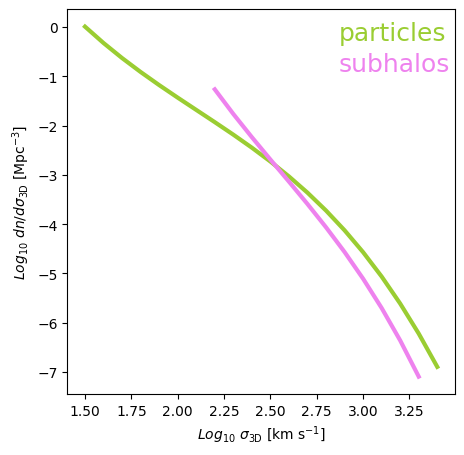

In [12]:
vdf3d_1= vdf3d_1[vdf3d_1[:, 1] != -np.inf]
vdf3d_2= vdf3d_2[vdf3d_2[:, 1] != -np.inf]

vdf_1 = np.polyfit(vdf3d_1[:,0], vdf3d_1[:,1], 3)
vdf_2 = np.polyfit(vdf3d_2[:,0], vdf3d_2[:,1], 3)

x1 = np.arange(1.5,3.5,0.1)
y1 = np.polyval(vdf_1,x1)
x2 = np.arange(2.2,3.4,0.1)
y2 = np.polyval(vdf_2,x2)

fig=plt.figure(figsize=(11,11))
ax=fig.add_subplot(2,2,1)
# ax.scatter(vdf3d_1[:,0], vdf3d_1[:,1], color='g')
ax.plot(x1, y1, color='yellowgreen', linewidth=3, linestyle='-')
# ax.scatter(vdf3d_2[:,0], vdf3d_2[:,1], color='b')
ax.plot(x2, y2, color='violet', linewidth=3, linestyle='-')

ax.set_xlabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
ax.set_ylabel(r'$Log_{10}~dn/d \sigma_{\rm 3D}~$[Mpc$^{-3}$]')

label = ['particles','subhalos']
colors = ['yellowgreen', 'violet']
for i in range(2):
    ax.text(0.7, 0.92 - i * 0.08, label[i], size=18, color=colors[i], transform=ax.transAxes)
    
# plt.legend(ncol=2, prop={'size':9})

Text(0, 0.5, 'Number of halos')

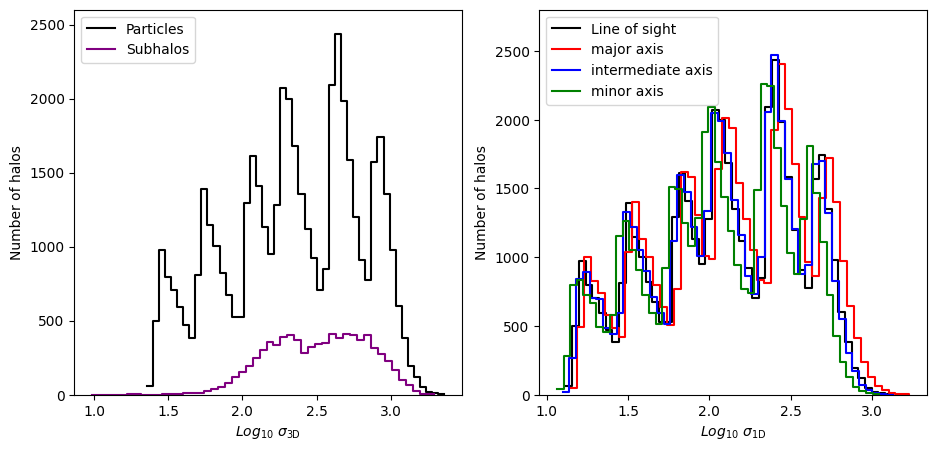

In [13]:
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])
all_veldisp_1d = np.concatenate([dataset[:, 14] for dataset in datasets])
all_veldisp_major = np.concatenate([dataset[:, 15] for dataset in datasets])
all_veldisp_semi = np.concatenate([dataset[:, 16] for dataset in datasets])
all_veldisp_minor = np.concatenate([dataset[:, 17] for dataset in datasets])
all_veldisp_v = np.concatenate([dataset[:, 18] for dataset in datasets])
all_veldisp_subhalo = np.concatenate([dataset[:, 34] for dataset in datasets])

# plt.hist(np.log10(all_veldisp_3d), bins=50, color='skyblue', edgecolor='black', linewidth=1.2)

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)

hist1, bins1 = np.histogram(np.log10(all_veldisp_3d), bins=50)
ax.step(bins1[:-1], hist1, where='post', color='black',label='Particles')

all_veldisp_subhalo = np.array(all_veldisp_subhalo)
all_veldisp_subhalo = all_veldisp_subhalo[all_veldisp_subhalo>0]
hist2, bins2 = np.histogram(np.log10(all_veldisp_subhalo), bins=50)
ax.step(bins2[:-1], hist2, where='post', color='purple',label='Subhalos')

plt.ylim(0,2600)
plt.legend(loc='upper left')
ax.set_xlabel(r"$Log_{10}~\sigma_{\rm 3D}$")
ax.set_ylabel(r"Number of halos")

########################################
ax=fig.add_subplot(1,2,2)

hist3, bins3 = np.histogram(np.log10(all_veldisp_1d), bins=50)
ax.step(bins3[:-1], hist3, where='post', color='black',label='Line of sight')

hist4, bins4 = np.histogram(np.log10(all_veldisp_major), bins=50)
ax.step(bins4[:-1], hist4, where='post', color='r',label='major axis')

hist5, bins5 = np.histogram(np.log10(all_veldisp_semi), bins=50)
ax.step(bins5[:-1], hist5, where='post', color='b',label='intermediate axis')

hist6, bins6 = np.histogram(np.log10(all_veldisp_minor), bins=50)
ax.step(bins6[:-1], hist6, where='post', color='g',label='minor axis')

plt.ylim(0,2800)
plt.legend(loc='upper left')
ax.set_xlabel(r"$Log_{10}~\sigma_{\rm 1D}$")
ax.set_ylabel(r"Number of halos")

# plt.savefig('figures/veldisp_distribution.png', bbox_inches='tight')

/tmp/ipykernel_231092/3606623621.py:8: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_Nsub)
/fred/oz009/mzhang/anaconda/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/tmp/ipykernel_231092/3606623621.py:27: RuntimeWarning: divide by zero encountered in log10
  y_values = np.log10(dataset[:, 29])
/tmp/ipykernel_231092/3606623621.py:40: RuntimeWarning: divide by zero encountered in log10
  y_values = np.log10(dataset[:, 29])
/tmp/ipykernel_231092/3606623621.py:50: RuntimeWarning: invalid value encountered in log10
  dataset = dataset[np.log10(dataset[:, 40])+10 !=2]
/tmp/ipykernel_231092/3606623621.py:52: RuntimeWarning: divide by zero encountered in log10
  y_values = np.log10(dataset[:, 29])


Text(0.5, 0, 'Log$_{10}~\\eta$')

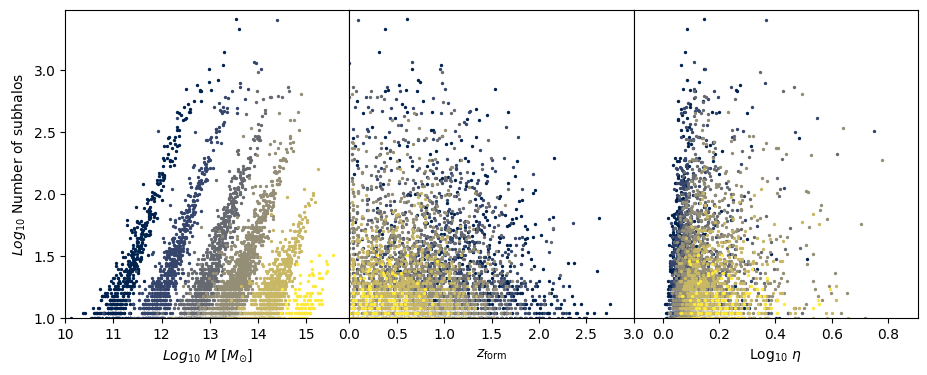

In [14]:
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_accretion = np.concatenate([dataset[:, 40] for dataset in datasets])
all_virial_ratio = np.concatenate([dataset[:, 10] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_Nsub)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
# bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
# bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,4))
fig.subplots_adjust(wspace=0)
# fig.subplots_adjust(hspace=0.0)
ax=fig.add_subplot(1,3,1)

colors = plt.cm.cividis(np.linspace(0, 1, len(datasets)))
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 29])
    ax.scatter(x_values, y_values, s=2, color=color)
    
# ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
# ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')
plt.ylim([1,3.49])
plt.xlim([10,15.9])
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r"$Log_{10}$ Number of subhalos")

ax=fig.add_subplot(1,3,2)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 39]
    y_values = np.log10(dataset[:, 29])
    ax.scatter(x_values, y_values, s=2, color=color)
plt.yticks([])
plt.ylim([1,3.49])
plt.xlim([0,3])
ax.set_xlabel(r"$z_{\rm form}$")


ax=fig.add_subplot(1,3,3)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    dataset = dataset[np.log10(dataset[:, 40])+10 !=2]
    x_values = np.log10(dataset[:, 10])
    y_values = np.log10(dataset[:, 29])
    ax.scatter(x_values, y_values, s=2, color=color)
plt.yticks([])
plt.ylim([1,3.49])
ax.set_xlabel(r"Log$_{10}~\eta$")

# plt.savefig('figures/number_of_subhalos.png', bbox_inches='tight')

/tmp/ipykernel_231092/465387909.py:9: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_veldisp_3d_sub)
/tmp/ipykernel_231092/465387909.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]), s=2, color=color)
/tmp/ipykernel_231092/465387909.py:44: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_veldisp_3d_sub[all_Nsub>10])
/tmp/ipykernel_231092/465387909.py:53: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(all_veldisp_3d_sub[all_Nsub>10]), s=4, color="purple", label="Halos (Nsub>10)")


Text(0, 0.5, '$Log_{10}~\\sigma$ [km s$^{-1}$]')

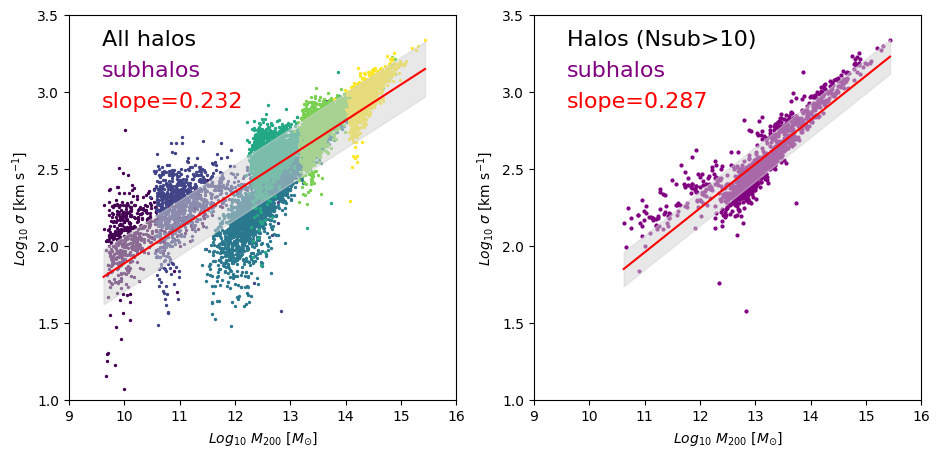

In [15]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])

x = np.log10(all_M200) + 10
y = np.log10(all_veldisp_3d_sub)

valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]), s=2, color=color)
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit')  

residuals = y - (slope * x + intercept)
std_residuals = np.std(residuals)

# Plot the standard deviation area
upper_bound = best_fit_y + std_residuals
lower_bound = best_fit_y - std_residuals
plt.fill_between(best_fit_x, upper_bound, lower_bound, color='lightgrey', alpha=0.5)

plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.3,'All halos', size=16, color='black')
ax.text(9.6,3.1,'subhalos', size=16, color='purple')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
# ax.legend(fontsize=16, loc='upper left')

#############################################
x = np.log10(all_M200[all_Nsub>10]) + 10
y = np.log10(all_veldisp_3d_sub[all_Nsub>10])
valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

ax=fig.add_subplot(1,2,2)
ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(all_veldisp_3d_sub[all_Nsub>10]), s=4, color="purple", label="Halos (Nsub>10)")
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit') 


residuals = y - (slope * x + intercept)
std_residuals = np.std(residuals)

# Plot the standard deviation area
upper_bound = best_fit_y + std_residuals
lower_bound = best_fit_y - std_residuals
plt.fill_between(best_fit_x, upper_bound, lower_bound, color='lightgrey', alpha=0.5)

plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.3,'Halos (Nsub>10)', size=16, color='black')
ax.text(9.6,3.1,'subhalos', size=16, color='purple')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')

# plt.savefig('figures/veldisp_subhalo_mass.png')

0.33116565406308934 0.9984049617609053 0.0 8.567276522837878e-05


/tmp/ipykernel_231092/2844676141.py:35: RuntimeWarning: divide by zero encountered in log10
  y2 = np.log10(all_veldisp_3d_sub)
/tmp/ipykernel_231092/2844676141.py:54: RuntimeWarning: divide by zero encountered in log10
  y3 = np.log10(all_veldisp_3d_sub[all_Nsub>10])


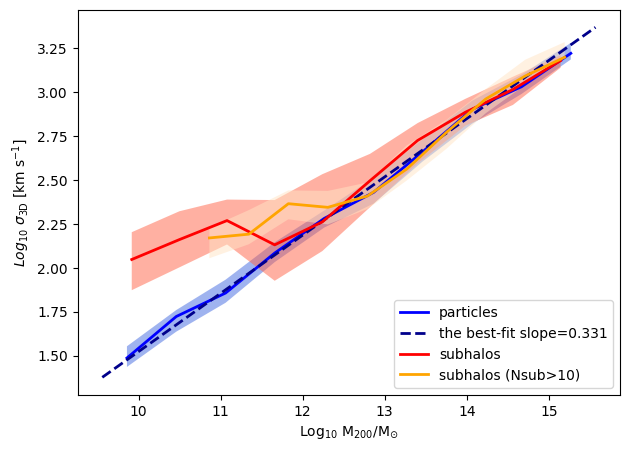

In [16]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)

x1 = np.log10(all_M200)+10
y1 = np.log10(all_veldisp_3d)

slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.5)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=2, color='blue', label=r"particles")
ax.plot(best_fit_x1, best_fit_y1, color='darkblue', linewidth=2, linestyle='--', label=f'the best-fit slope={slope:.3f}')
print(slope,r_value, p_value, std_err)
###################
x2 = np.log10(all_M200) + 10
y2 = np.log10(all_veldisp_3d_sub)

valid_indices = np.logical_and(np.isfinite(x2), np.isfinite(y2))
x2 = x2[valid_indices]
y2 = y2[valid_indices]

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians2 = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q12 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q32 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q12, bin_q32, facecolor='tomato', alpha=0.5)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians2, linewidth=2, color='red', label=r"subhalos")

#########################
x3 = np.log10(all_M200[all_Nsub>10]) + 10
y3 = np.log10(all_veldisp_3d_sub[all_Nsub>10])

valid_indices = np.logical_and(np.isfinite(x3), np.isfinite(y3))
x3 = x3[valid_indices]
y3 = y3[valid_indices]

num_bins = 10
bin_edges = np.linspace(np.min(x3), np.max(x3), num_bins+1)
bin_indices = np.digitize(x3, bin_edges) 

bin_medians3 = np.array([np.median(y3[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q13 = np.array([np.percentile(y3[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q33 = np.array([np.percentile(y3[bin_indices == i], 84) for i in range(1, num_bins + 1)])

ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q13, bin_q33, facecolor='bisque', alpha=0.5)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians3, linewidth=2, color='orange', label=r"subhalos (Nsub>10)")

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')
plt.savefig('figures/veldisp_mass_3.png')

Text(0.5, 0, 'Log$_{10}$ M$_{200}$/M$_{\\odot}$')

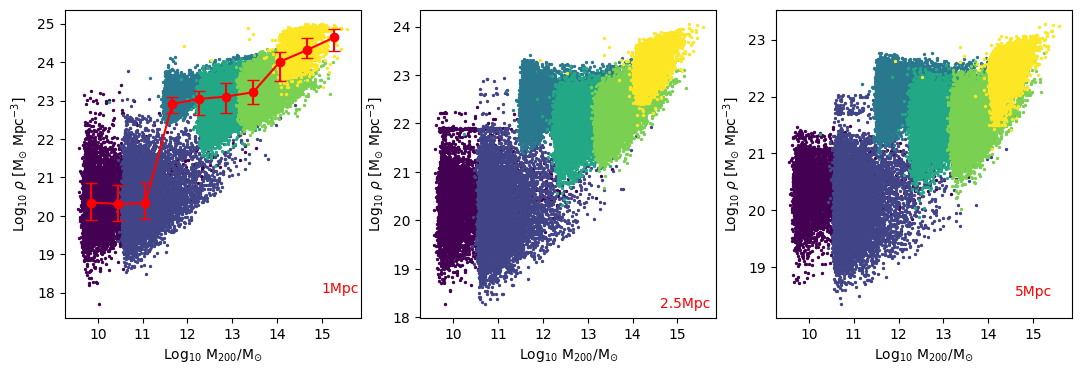

In [17]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_env1 = np.concatenate([dataset[:, 21] for dataset in datasets])
all_env2 = np.concatenate([dataset[:, 22] for dataset in datasets])
all_env3 = np.concatenate([dataset[:, 23] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_env1)+10
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
# bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
# bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(13,4))
# fig.subplots_adjust(wspace=0)
# fig.subplots_adjust(hspace=0.0)
ax=fig.add_subplot(1,3,1)
# for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 40])+10, s=2, color=color)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 21]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)
    
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

plt.text(15,18,'1Mpc',color='r')
plt.ylabel(r"Log$_{10}~\rho$ [M$_{\odot}$ Mpc$^{-3}$]")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

ax=fig.add_subplot(1,3,2)
# for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 40])+10, s=2, color=color)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 22]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)

plt.text(14.6,18.2,'2.5Mpc',color='r')
plt.ylabel(r"Log$_{10}~\rho$ [M$_{\odot}$ Mpc$^{-3}$]")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

ax=fig.add_subplot(1,3,3)
# for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 40])+10, s=2, color=color)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 23]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)

plt.text(14.6,18.5,'5Mpc',color='r')
plt.ylabel(r"Log$_{10}~\rho$ [M$_{\odot}$ Mpc$^{-3}$]")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

Text(0.5, 0, 'Log$_{10}$ M$_{200}$/M$_{\\odot}$')

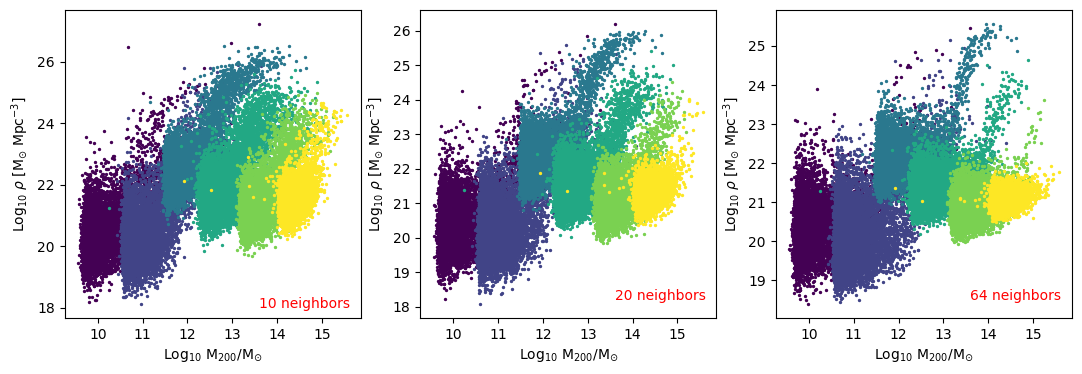

In [18]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_env4 = np.concatenate([dataset[:, 24] for dataset in datasets])
all_env5 = np.concatenate([dataset[:, 25] for dataset in datasets])
all_env6 = np.concatenate([dataset[:, 26] for dataset in datasets])

fig=plt.figure(figsize=(13,4))

ax=fig.add_subplot(1,3,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 24]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)
    
plt.text(13.6,18,'10 neighbors',color='r')
plt.ylabel(r"Log$_{10}~\rho$ [M$_{\odot}$ Mpc$^{-3}$]")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

ax=fig.add_subplot(1,3,2)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 25]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)

plt.text(13.6,18.2,'20 neighbors',color='r')
plt.ylabel(r"Log$_{10}~\rho$ [M$_{\odot}$ Mpc$^{-3}$]")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

ax=fig.add_subplot(1,3,3)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 26]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)

plt.text(13.6,18.5,'64 neighbors',color='r')
plt.ylabel(r"Log$_{10}~\rho$ [M$_{\odot}$ Mpc$^{-3}$]")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

Text(0.5, 0, 'Log$_{10}$ Halo Mass [M$_{\\odot}$]')

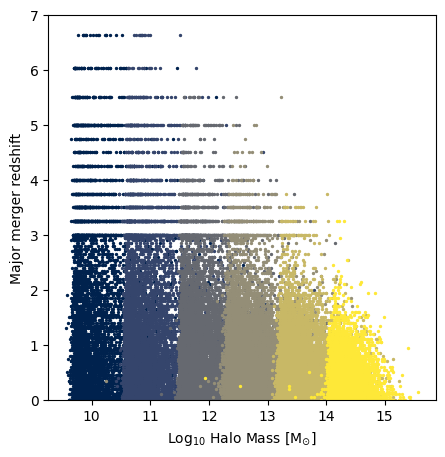

In [19]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.cividis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_major_merger = np.concatenate([dataset[:, 41] for dataset in datasets])

# x = np.log10(all_M200)+10
# y = all_major_merger
# num_bins = 10
# bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
# bin_indices = np.digitize(x, bin_edges) 

# bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
# bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
# bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(5,5))

ax=fig.add_subplot(1,1,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, dataset[:, 41], s=2, color=color)
 
# ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
# ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')
plt.ylim(0,7)
plt.ylabel(r"Major merger redshift")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

Text(0.5, 0, 'Log$_{10}$ Halo Mass [M$_{\\odot}$]')

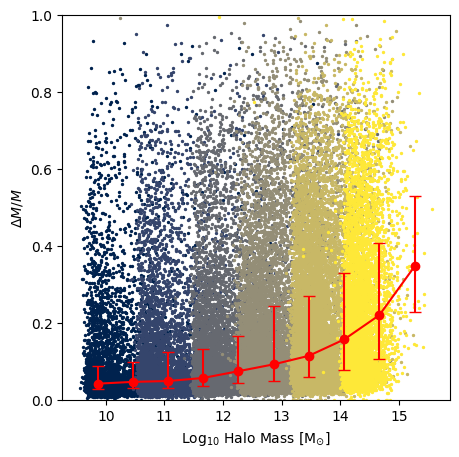

In [20]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.cividis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_merger = np.concatenate([dataset[:, 42] for dataset in datasets])

x = np.log10(all_M200)+10
y = all_merger
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(5,5))

ax=fig.add_subplot(1,1,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, dataset[:, 42], s=2, color=color)
 
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')

plt.ylim(0,1)
plt.ylabel(r"$\Delta M/ M$")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")